In [12]:
import sys
sys.path.append('..')

from sklearn.datasets import make_regression

import numpy as np
from src import grad_desc_algos as gda

import timeit

import matplotlib.pyplot as plt
from matplotlib import ticker, cm
%matplotlib inline

## Import dataset

In [2]:
features, target, coef = make_regression(n_samples=1000,
                                         n_features=2,
                                         n_informative=2,
                                         n_targets=1,
                                         noise=10.0,
                                         coef = True,
                                         random_state=1)

## Batch Gradient Descent

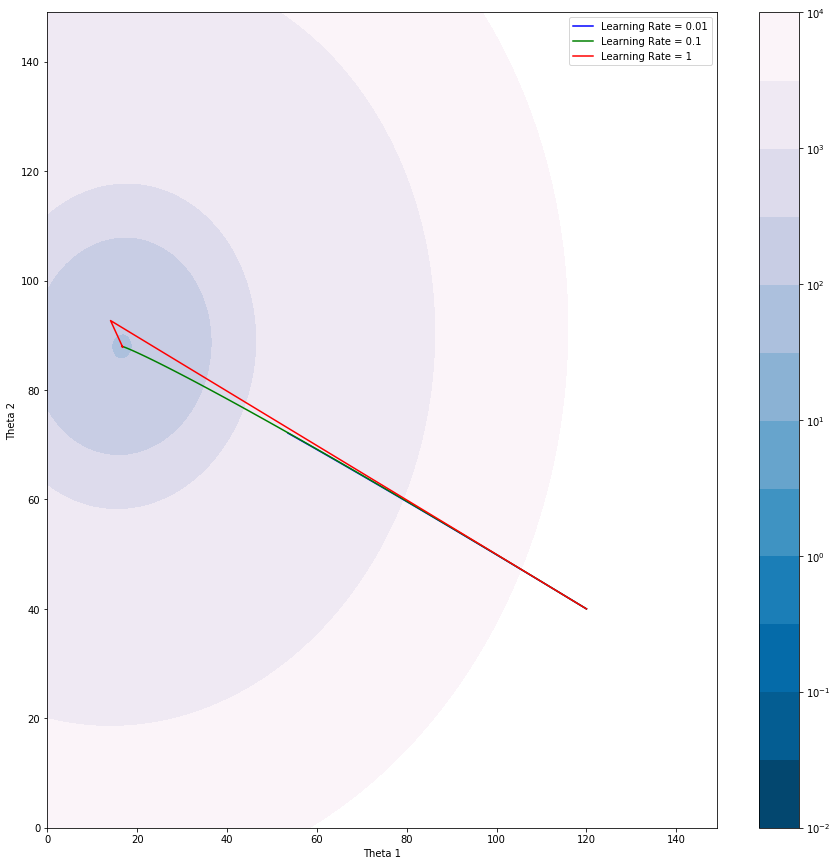

Final thetas: [16.61830202 87.98176447]
Actual Coefficents: [16.88001901 87.91985605]


In [4]:
x = np.arange(0, 150, 1)
y = np.arange(0, 150, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.average((np.dot(features, np.array([xx, yy])) - target) ** 2)
levels = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

fig, ax = plt.subplots(figsize=(15, 15))
cs = ax.contourf(x,y,z, levels, locator=ticker.LogLocator(), cmap=cm.PuBu_r)

epochs = 100

learing = [0.01, 0.1, 1]
colors = ['b', 'g', 'r']
random_start = [np.array([120, 40.]) for i in range(3)]

for lr, c, rs in zip(learing, colors,random_start):
    theta = rs
    #thetas, MSE = batch_gradient_descent(features, target, theta, lr, epochs)
    thetas, MSE = gda.batch_gradient_descent(features, target, theta, lr, epochs)
    ax.plot(thetas[:,0],thetas[:,1], c, label='Learning Rate = {}'.format(lr))
    ax.legend()
    
cbar = fig.colorbar(cs)
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.show()
print("Final thetas: {}".format(thetas[-1]))
print("Actual Coefficents: {}".format(coef))

## Stochastic Gradient Descent

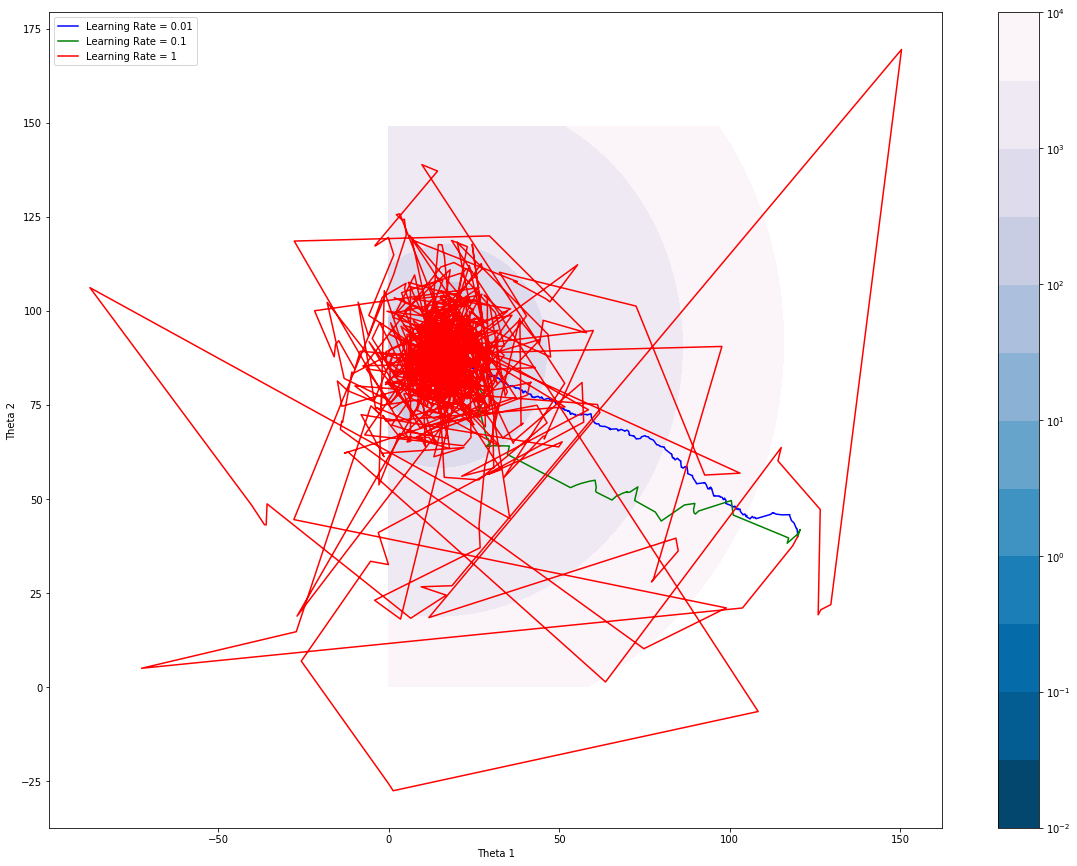

Final thetas: [22.56309836 92.93260735]
Actual Coefficents: [16.88001901 87.91985605]


In [101]:
x = np.arange(0, 150, 1)
y = np.arange(0, 150, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.average((np.dot(features, np.array([xx, yy])) - target) ** 2)
levels = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

fig, ax = plt.subplots(figsize=(20, 15))
cs = ax.contourf(x,y,z, levels, locator=ticker.LogLocator(), cmap=cm.PuBu_r)


learing = [0.01, 0.1, 1]
colors = ['b', 'g', 'r']
random_start = [np.array([120, 40.]) for i in range(3)]
epochs = 100

for lr, c, rs in zip(learing, colors,random_start):
    theta = rs
    thetas, MSE = gda.stochastic_gradient_descent(features, target, theta, lr, epochs)
    #thetas, MSE = stochastic_gradient_descent(features, target, theta, lr, epochs)
    ax.plot(thetas[:,0],thetas[:,1], c, label='Learning Rate = {}'.format(lr))
    ax.legend()
    
cbar = fig.colorbar(cs)
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.show()
print("Final thetas: {}".format(thetas[-1]))
print("Actual Coefficents: {}".format(coef))

In [6]:
## Compare to each other. 
## minibatch GD

## Minibatch Gradient Descent

In [91]:
def minibatch_gradient_descent(X, y, weights, learning_rate, epochs, batch_size):

    cumulative_weights = weights  # initialize weights
    results = np.array([[0,0]])   # starting point

    for i in range(epochs):
        y = np.reshape(y, (y.shape[0], 1))  # Takes a single dimensional array and converts to multi-dimensional.
                                            # Need to generalize here.
        Xy = np.concatenate((X,y), axis = 1)  # combine X and y to ensure each linear equation stays the same
        np.random.shuffle(Xy)

        m = Xy.shape[0]
        
        if m % batch_size != 0:
            for i in range(m//batch_size):
                X = Xy[batch_size*(i):batch_size*(i+1), :X.shape[1]] # Split X  back out
                y = Xy[batch_size*(i):batch_size*(i+1):, -1]  # Split y back out
                weights, MSE = gda.gd(X, y, weights, learning_rate)
                cumulative_weights = np.vstack([cumulative_weights, weights])
                results = np.vstack([results, np.array([i+1, MSE])])  # Will return multiple values for each iteration
            X = Xy[batch_size*(m//batch_size):, :X.shape[1]] # Split X  back out
            y = Xy[batch_size*(m//batch_size):, -1]
            weights, MSE = gda.gd(X, y, weights, learning_rate)
            cumulative_weights = np.vstack([cumulative_weights, weights])
            results = np.vstack([results, np.array([i+1, MSE])])
            return cumulative_weights, results
        
        else:
            for i in range(m//batch_size):
                X = Xy[batch_size*(i):batch_size*(i+1), :X.shape[1]] # Split X  back out
                y = Xy[batch_size*(i):batch_size*(i+1):, -1]  # Split y back out
                weights, MSE = gda.gd(X, y, weights, learning_rate)
                cumulative_weights = np.vstack([cumulative_weights, weights])
                results = np.vstack([results, np.array([i+1, MSE])])
            return cumulative_weights, results

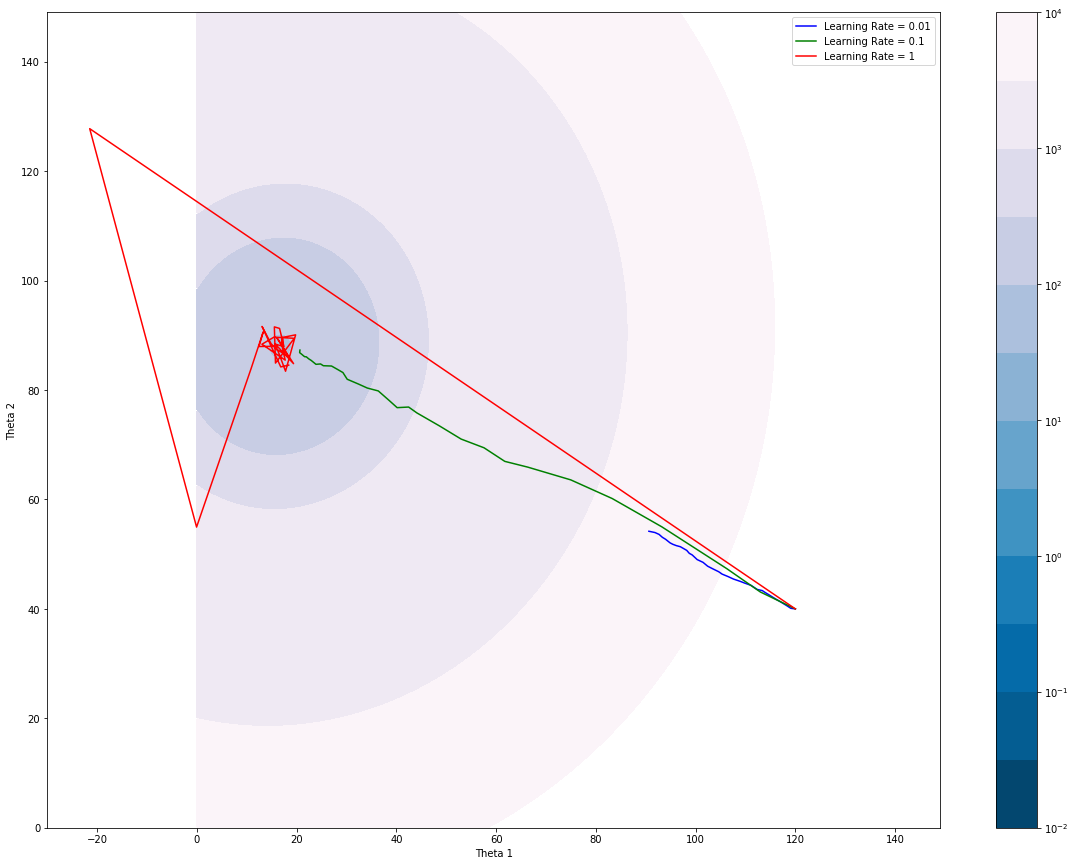

Final thetas: [18.39223464 84.53863219]
Actual Coefficents: [16.88001901 87.91985605]


In [100]:
x = np.arange(0, 150, 1)
y = np.arange(0, 150, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.average((np.dot(features, np.array([xx, yy])) - target) ** 2)
levels = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

fig, ax = plt.subplots(figsize=(20, 15))
cs = ax.contourf(x,y,z, levels, locator=ticker.LogLocator(), cmap=cm.PuBu_r)


learing = [0.01, 0.1, 1]
colors = ['b', 'g', 'r']
random_start = [np.array([120, 40.]) for i in range(3)]
epochs = 1000
batch_size = 32

for lr, c, rs in zip(learing, colors,random_start):
    theta = rs
    thetas, MSE = minibatch_gradient_descent(features, target, theta, lr, epochs, batch_size)
    #thetas, MSE = stochastic_gradient_descent(features, target, theta, lr, epochs)
    ax.plot(thetas[:,0],thetas[:,1], c, label='Learning Rate = {}'.format(lr))
    ax.legend()
    
cbar = fig.colorbar(cs)
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.show()
print("Final thetas: {}".format(thetas[-1]))
print("Actual Coefficents: {}".format(coef))

In [82]:
A = np.random.rand(32000, 3)
m = A.shape[0]

batch_size = 32

if m % batch_size != 0:
    remainder = True
else:
    remainder = False

if remainder:
    print("Batch Size: {}".format(batch_size))
    for i in range(m//batch_size):
        print("Batch number: {}".format(i+1))
        print(A[batch_size*(i):batch_size*(i+1),:])
    print("Batch number: {} with remainder: {}".format(batch_size, m%batch_size))
    print(A[batch_size*(m//batch_size):, :])
    
else:
    print("Batch Size: {}".format(batch_size))
    for i in range(m//batch_size):
        print("Batch number: {}".format(i+1))
        print(A[batch_size*(i):batch_size*(i+1),:])


Batch Size: 32
Batch number: 1
[[0.60967231 0.01909406 0.97543455]
 [0.45029745 0.14235016 0.90527036]
 [0.98678629 0.15073662 0.94510635]
 [0.53069618 0.98104183 0.91758572]
 [0.53009145 0.08617235 0.41847403]
 [0.10925981 0.02608027 0.73939238]
 [0.15431461 0.06584858 0.23389487]
 [0.52086319 0.55521054 0.61380725]
 [0.3392719  0.72301645 0.97167561]
 [0.23393678 0.58322319 0.62279134]
 [0.31660393 0.33441529 0.02367366]
 [0.26418825 0.94435085 0.45523125]
 [0.81044433 0.00294465 0.78754618]
 [0.66026253 0.17999869 0.83009233]
 [0.14022851 0.32833651 0.22742353]
 [0.78294397 0.18630705 0.23360996]
 [0.09687174 0.94043139 0.57196333]
 [0.27275193 0.18163422 0.4901187 ]
 [0.6500177  0.84900529 0.57784553]
 [0.18056465 0.2011862  0.70658405]
 [0.61226566 0.48891135 0.0140158 ]
 [0.74367465 0.36419499 0.91507435]
 [0.77264595 0.70400956 0.73005259]
 [0.221073   0.69234334 0.31136845]
 [0.9125679  0.17951907 0.93147381]
 [0.46737625 0.39526984 0.51405801]
 [0.87715695 0.77893462 0.2204904

[[9.67714346e-01 8.33587481e-01 2.44632946e-01]
 [1.49520654e-01 9.74247795e-04 6.76742060e-01]
 [5.76788566e-01 4.67085849e-01 7.72166082e-01]
 [1.53044422e-01 6.06426500e-01 9.03130971e-01]
 [3.73858037e-01 3.79396994e-01 3.49930471e-01]
 [7.44745758e-01 4.44340049e-01 6.72952136e-02]
 [8.26121416e-01 1.69038838e-01 2.56749938e-02]
 [3.98227503e-01 7.09354413e-01 9.58023169e-01]
 [9.24812770e-01 6.83432403e-02 9.87586074e-01]
 [3.13354442e-01 3.34423076e-01 5.67407364e-01]
 [1.95017321e-01 1.49033279e-01 7.66659155e-01]
 [1.29015882e-02 3.36205043e-02 2.99812629e-01]
 [3.68383869e-01 8.31404954e-01 8.51872799e-01]
 [5.44014147e-01 5.57315192e-01 5.83981481e-01]
 [1.48917304e-01 1.02323196e-01 6.82011910e-01]
 [7.32198904e-01 3.76152025e-01 1.97198713e-01]
 [5.15705152e-01 1.84079495e-01 6.70314314e-01]
 [7.04134967e-01 7.45111954e-01 4.56945833e-01]
 [8.36454568e-01 3.09999331e-01 2.47101055e-02]
 [6.76062824e-01 7.95177487e-01 2.58183606e-01]
 [5.29193853e-01 5.56839720e-01 6.457530

[[0.69520123 0.70736058 0.4143833 ]
 [0.41086004 0.78528769 0.29365342]
 [0.579097   0.1171636  0.42606534]
 [0.78275526 0.64357598 0.29524566]
 [0.28995063 0.31868291 0.93388992]
 [0.83097034 0.34472564 0.99970173]
 [0.03756046 0.25184176 0.46577664]
 [0.57307172 0.05719904 0.96469399]
 [0.76124168 0.8481053  0.52929499]
 [0.45950262 0.85024226 0.99251443]
 [0.02090405 0.73694965 0.97392473]
 [0.9044166  0.84855807 0.5380625 ]
 [0.06136228 0.14210393 0.40200822]
 [0.68296453 0.12425803 0.29272878]
 [0.39722207 0.40319676 0.04230049]
 [0.51076647 0.31051494 0.60732031]
 [0.99471748 0.899345   0.80026104]
 [0.48283446 0.62751794 0.9811184 ]
 [0.18112352 0.42324415 0.15252855]
 [0.38109827 0.22484811 0.71577838]
 [0.77402517 0.01990015 0.30629646]
 [0.91833034 0.20169653 0.29782431]
 [0.52721284 0.69073598 0.6645763 ]
 [0.39981411 0.45165852 0.28522796]
 [0.62485697 0.68791289 0.72212612]
 [0.54796157 0.52838246 0.20465362]
 [0.37067227 0.82846104 0.41412332]
 [0.12126615 0.81622307 0.94

[[0.17568394 0.35319588 0.88990018]
 [0.48423634 0.89243409 0.374115  ]
 [0.84183754 0.75681943 0.38440156]
 [0.39419453 0.72728161 0.32033327]
 [0.08071418 0.04596874 0.55216383]
 [0.41642909 0.48297083 0.45459637]
 [0.7086936  0.67667988 0.97270404]
 [0.98939949 0.73994306 0.85571124]
 [0.3180343  0.11765037 0.28390222]
 [0.04276728 0.11891361 0.50408403]
 [0.13717134 0.86391664 0.92752278]
 [0.8769137  0.2017745  0.08079404]
 [0.63200554 0.6815974  0.4428479 ]
 [0.81949063 0.70402111 0.91990674]
 [0.8961649  0.99276226 0.95617809]
 [0.03765761 0.06397289 0.30754606]
 [0.5269953  0.22840971 0.75973218]
 [0.70540527 0.28663236 0.49141   ]
 [0.14115186 0.8533674  0.29485605]
 [0.71021396 0.78327032 0.38403098]
 [0.06199681 0.92995129 0.634526  ]
 [0.55785123 0.29114473 0.93930379]
 [0.31689956 0.10338416 0.26497255]
 [0.4163224  0.24108391 0.13344634]
 [0.20259448 0.9839064  0.69882125]
 [0.75680984 0.90699646 0.8437776 ]
 [0.31043292 0.09082025 0.65515398]
 [0.53704456 0.09157153 0.83

Batch number: 835
[[0.09512085 0.8485913  0.62758465]
 [0.48169157 0.1215061  0.71845597]
 [0.61864631 0.59880421 0.37883656]
 [0.62257789 0.69354247 0.33201986]
 [0.52005381 0.39033041 0.61750014]
 [0.75720324 0.95534377 0.91803322]
 [0.61905416 0.66969086 0.18636282]
 [0.20278975 0.00513054 0.18735744]
 [0.60730327 0.4754502  0.46332498]
 [0.92023381 0.09677216 0.09575653]
 [0.38381791 0.95219629 0.52102992]
 [0.26628289 0.99986912 0.9845476 ]
 [0.16525557 0.39770728 0.7982093 ]
 [0.70678517 0.75010446 0.66958887]
 [0.06142475 0.62032946 0.90446423]
 [0.21332845 0.13274407 0.61979911]
 [0.38485625 0.32173281 0.79817438]
 [0.07955216 0.95302735 0.47485942]
 [0.75196256 0.58220057 0.7567379 ]
 [0.39186698 0.59209299 0.49031921]
 [0.8216915  0.34247467 0.831095  ]
 [0.54814711 0.92122459 0.17622388]
 [0.00275563 0.3410457  0.34939782]
 [0.44966476 0.76822067 0.01573034]
 [0.50299187 0.06040379 0.26988948]
 [0.55179307 0.18252332 0.75684892]
 [0.46703281 0.83890429 0.89360127]
 [0.698538